In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset train dan test 

data_train = pd.read_csv("kendaraan_train.csv")
data_test = pd.read_csv("kendaraan_test.csv")

In [3]:
data_train.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
data_test.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## 1. Visualisasi Sebelum Preprocessing Untuk Data Train

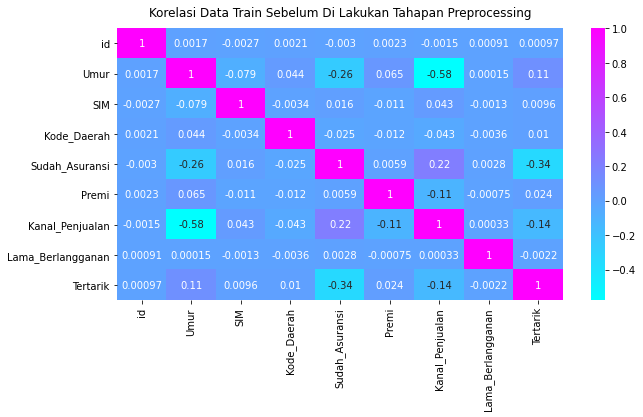

In [5]:
# Membuat visaulisasi sebelum data di lakukan tahapan preprocessing. Hal ini kami lakukan untuk melihat sebuah perbedaan antara
# nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing dan sesudah di preprocessing pada data train

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Kenapa hanya beberapa kolom saja yang terlihat nilai korelasinya, yakni hanya 9 kolom saja dari 12 kolom? Hal tersebut dikarenakan 3 kolom (yakni kolom "Jenis_Kelamin", "Umur_Kendaraan", dan "Kendaraan_Rusak") memiliki tipe string atau masih berupa kategorik. Sedangkan untuk melihat nilai korelasi dibutuhkan tipe data numerik, yaitu integer ataupun float.

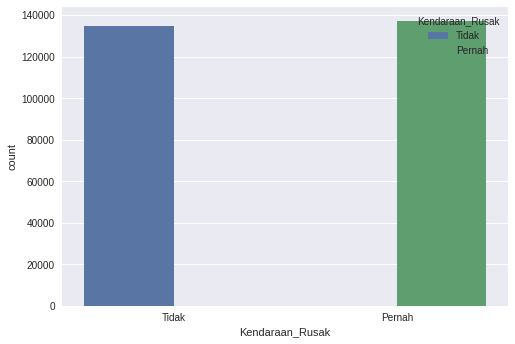

<Figure size 504x504 with 0 Axes>

In [6]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

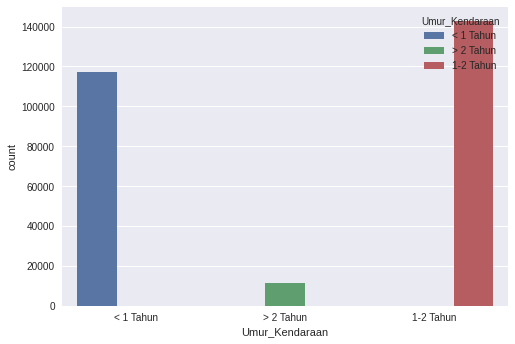

<Figure size 504x504 with 0 Axes>

In [7]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

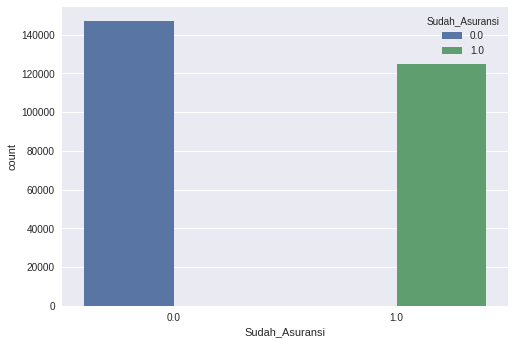

<Figure size 504x504 with 0 Axes>

In [8]:
# Melakukan visualisasi untuk kolom "Jenis_Kelamin" pada data train

plt.style.use("seaborn")
sns.countplot(x="Sudah_Asuransi", hue="Sudah_Asuransi", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

Setelah melakukan visualisasi sebelum nilai data yang ada di data_train dilakukan preprocessing, kami akan mengecek terlebih dahulu apakah di dalam data_train memiliki nilai data yang kosong/NaN atau sama sekali tidak mempunyainya.




In [9]:
# Mengecek apakah di dalam data train terdapat nilai data yang NaN atau tidak

data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Terlihat pada data train terdapat banyak sekali nilai data yang masih kosong. Maka langkah selanjutnya kami akan melakukan proses preprocessing untuk data train.

## 2. Preprocessing Data Train

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Sebelum memasuki langkah preprocessing, kami akan memberi tahu bahwasanya ada beberapa tahapan yang kami lakukan di dalam preprocessing ini, diantaranya adalah:
1. Mengisi nilai yang kosong menjadi nilai data yang sudah ditentukan agar tidak terjadi bias. Semisal nilai kosong yang terdapat di dalam kolom "Umur_Kendaraan" akan kami isi menjadi nilai "> 2 Tahun". Dan Kolom "Kendaraan_Rusak" akan kami isi nilai kosongnya menjadi "Tidak".
2. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.
3. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.
4. Karena pada data train masih banyak sekali terdapat nilai yang kosong/NaN, sisanya akan kami isi dengan nilai rata-rata yang dimiliki oleh masing-masing kolom.

In [11]:
# Mulai mengganti nilai NaN pada kolom "Umur_Kendaraan" menjadi nilai yaitu "> 2 Tahun"
data_train["Umur_Kendaraan"] = data_train["Umur_Kendaraan"].fillna("> 2 Tahun")

# Mulai mengganti nilai NaN pada kolom "Kendaraan_Rusak" menjadi nilai yaitu "Tidak"
data_train["Kendaraan_Rusak"] = data_train["Kendaraan_Rusak"].fillna("Tidak")

data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


In [12]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_train = data_train.drop(["id", "Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Kanal_Penjualan"], axis = 1)
data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.0,1.0,< 1 Tahun,Tidak,97.0,0
1,48.0,0.0,> 2 Tahun,Pernah,158.0,0
2,21.0,1.0,< 1 Tahun,Tidak,119.0,0
3,58.0,0.0,1-2 Tahun,Tidak,63.0,0
4,50.0,0.0,> 2 Tahun,Tidak,194.0,0


In [13]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_train["Sudah_Asuransi"] = le.fit_transform(data_train["Sudah_Asuransi"])
data_train["Umur_Kendaraan"] = le.fit_transform(data_train["Umur_Kendaraan"])
data_train["Kendaraan_Rusak"] = le.fit_transform(data_train["Kendaraan_Rusak"])

data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.0,1,1,1,97.0,0
1,48.0,0,2,0,158.0,0
2,21.0,1,1,1,119.0,0
3,58.0,0,0,1,63.0,0
4,50.0,0,2,1,194.0,0


In [14]:
# Melihat data desktriptif dari setiap kolom yang ada di data train

data_train.describe()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
count,271617.000000,285831.000000,285831.000000,285831.000000,271839.000000,285831.000000
mean,38.844336,354.678705,0.590426,0.520265,154.286302,0.122471
std,15.522487,1798.587202,0.649304,0.499590,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,82.000000,0.000000
50%,36.000000,0.000000,1.000000,1.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,1.000000,227.000000,0.000000
max,85.000000,14230.000000,2.000000,1.000000,299.000000,1.000000


In [15]:
# Karena kolom "Umur" masih memiliki nilai NaN, maka kami akan mengganti/mengisinya nilai NaN menjadi nilai Mean

mean = data_train.mean()
data_train = data_train.replace(np.nan, mean)
data_train.head(15)

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.000000,1,1,1,97.0,0
1,48.000000,0,2,0,158.0,0
2,21.000000,1,1,1,119.0,0
3,58.000000,0,0,1,63.0,0
4,50.000000,0,2,1,194.0,0
5,21.000000,1,1,1,171.0,0
6,33.000000,0,2,0,215.0,1
7,23.000000,1,1,1,222.0,0
8,20.000000,1,1,1,31.0,0
9,54.000000,0,2,0,28.0,1


Dapat dilihat bahwasanya nilai NaN sudah tidak ada karena sudah diisi atau digantikan dengan nilai mean yang ada di dalam setiap kolom. Sebagai contoh pada kolom "Umur" memiliki nilai rata-rata yaitu 38.844336. Maka dari itu jika dilihat pada nilai indeks ke-11, yang sebelumnya memiliki nilai NaN atau tidak ada nilai, kini telah terisi oleh nilai 38.844336 karena di dalam script yang kami gunakan, kami mengisinya dengan nilai mean atau nilai rata-rata yang dimiliki oleh masing-masing kolom, sehingga karena kolom "Umur" memiliki nilai rata-rata yaitu 38.844336, maka nilai kosong yang ada (NaN) akan terisi menjadi 38.844336.

In [16]:
# Mengecek kembali apakah masih terdapat nilai yang masih kosong atau tidak di dalam data train

data_train.isnull().sum()

Umur                 0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Dapat dilihat bahwasanya nilai NaN sudah tidak ada karena sudah diisi atau digantikan dengan nilai mean yang ada di dalam setiap kolom. Maka selanjutnya kami akan membuat visualisasi kembali dari beberapa kolom setelah dilakukan tahapan preprocessing.

## 3. Visualisasi Setelah Preprocessing Pada Data Train

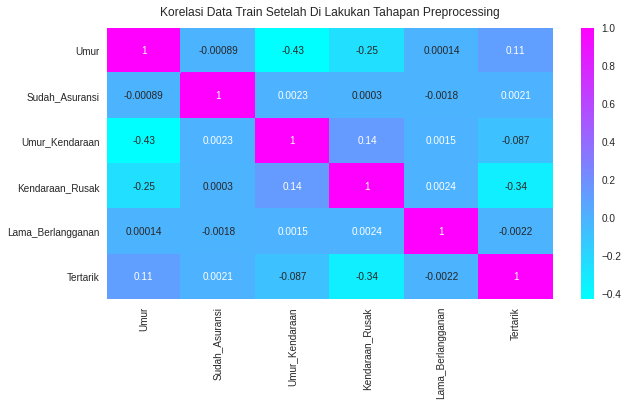

In [17]:
# Membuat visualisasi untuk menampilkan nilai korelasi agar dapat melihat perbedaan visualisasi antara sebelum di preprocessing
# dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

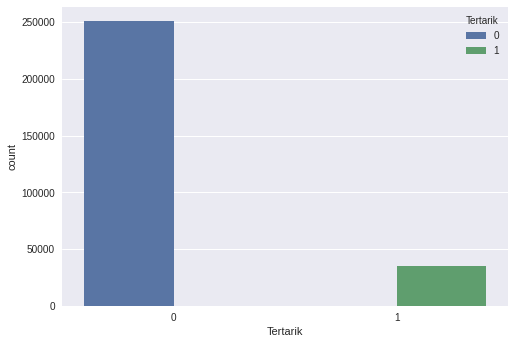

<Figure size 504x504 with 0 Axes>

In [18]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

plt.style.use("seaborn")
sns.countplot(x="Tertarik", hue="Tertarik", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

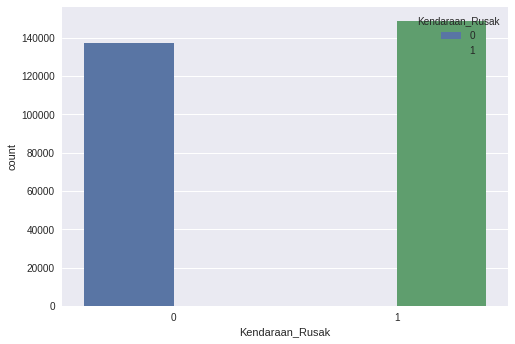

<Figure size 504x504 with 0 Axes>

In [19]:
# Melakukan visualisasi untuk kolom "Kendaraan_Rusak" pada data train

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

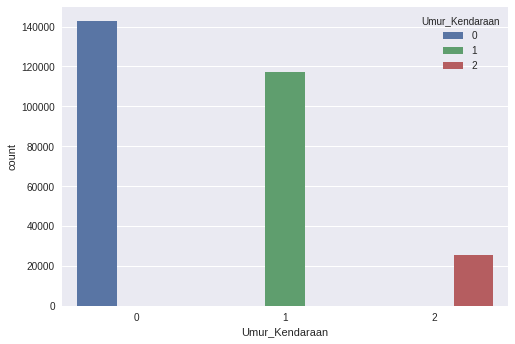

<Figure size 504x504 with 0 Axes>

In [20]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

## 4. Preprocessing + Visualisasi Pada Data Test

In [21]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [22]:
# Mengecek apakah di dalam data test terdapat data yang kosong (yang ditandai dengan NaN) atau tidak

data_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

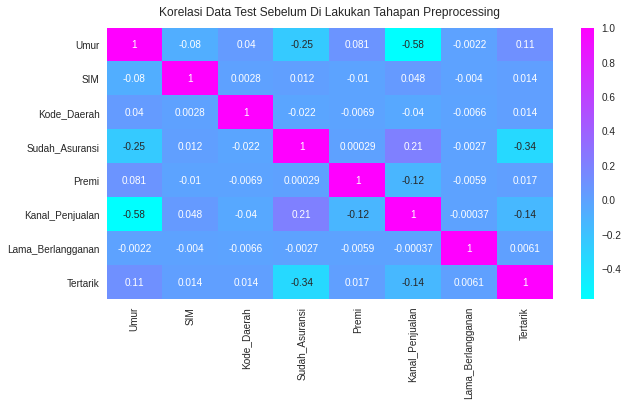

In [23]:
# Membuat visaulisasi sebelum data di lakukan tahapan preprocessing. Hal ini kami lakukan untuk melihat sebuah perbedaan antara
# nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing dan sesudah di preprocessing pada data train

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Sebelum memasuki langkah preprocessing, kami akan menjelaskan beberapa tahapan yang kami lakukan di dalam preprocessing ini, diantaranya adalah:
1. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.
2. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.

In [24]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_test["Jenis_Kelamin"] = le.fit_transform(data_test["Jenis_Kelamin"])
data_test["Umur_Kendaraan"] = le.fit_transform(data_test["Umur_Kendaraan"])
data_test["Kendaraan_Rusak"] = le.fit_transform(data_test["Kendaraan_Rusak"])

data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


In [25]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_test = data_test.drop(["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Kanal_Penjualan"], axis = 1)
data_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,49,0,0,0,145,0
1,22,1,1,1,241,0
2,24,1,1,1,62,0
3,46,1,0,1,34,0
4,35,0,0,0,229,0


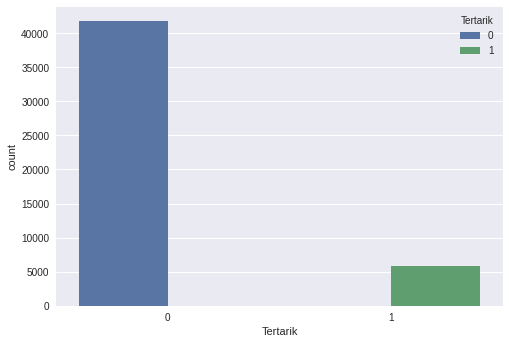

<Figure size 504x504 with 0 Axes>

In [26]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" dengan nilai hue yaitu kolom "Kendaraan_Rusak" pada data test

plt.style.use("seaborn")
sns.countplot(x="Tertarik", hue="Tertarik", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

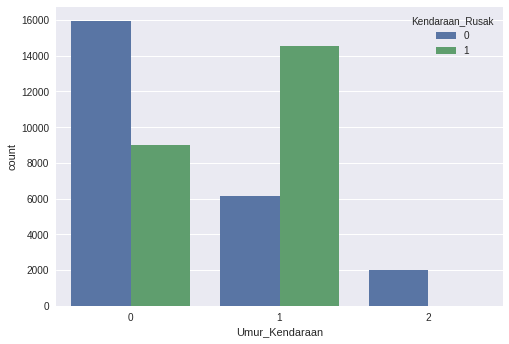

<Figure size 504x504 with 0 Axes>

In [27]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" dengan nilai hue yaitu kolom "Kendaraan_Rusak" pada data test

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Kendaraan_Rusak", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

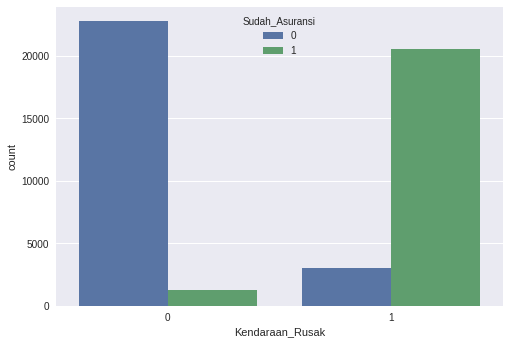

<Figure size 504x504 with 0 Axes>

In [28]:
# Melakukan visualisasi untuk kolom "Umur" dengan nilai hue yaitu kolom "Sudah_Asuransi" pada data test

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Sudah_Asuransi", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

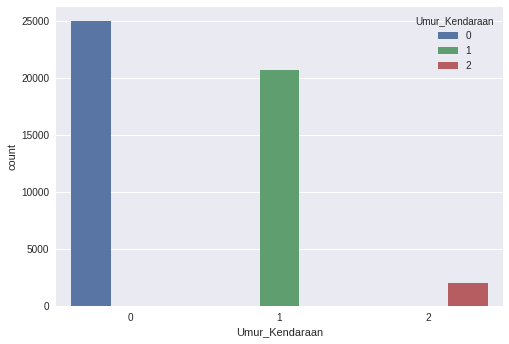

<Figure size 504x504 with 0 Axes>

In [29]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data test

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

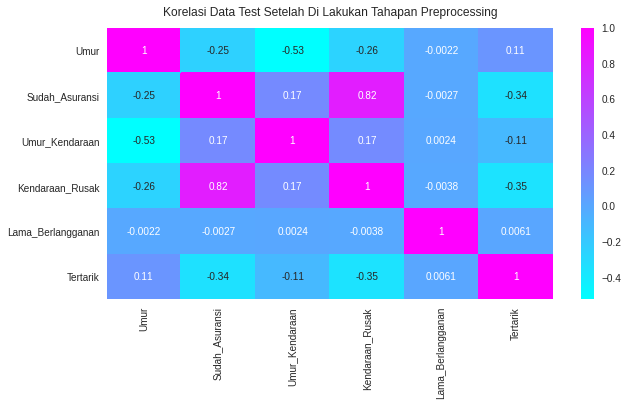

In [30]:
# Membuat visualisasi untuk menampilkan nilai korelasi dari data test agar dapat melihat perbedaan visualisasi 
# antara sebelum di preprocessing dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

## 5. Pemodelan Dengan Decision Tree Menggunakan Data Train

In [31]:
# Pemisahan data menjadi 2 variable

x = data_train.drop(["Tertarik"], axis=1)
y = data_train["Tertarik"]

In [32]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini kami memakai nilai test_size = 0.4 yang dimana ukuran dari variabel test mencapai 40% sehingga untuk ukuran variabel trainnya adalah 60%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [33]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [34]:
# Pemaggilan model decision tree terhadap variabel training

decisiontree =  DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = decisiontree.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = decisiontree.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [36]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
99202 987 13750 394
------------------Performa Variabel Train------------------------
149097 1539 12722 8140


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 99231.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 958.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 13754.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 390.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 149097.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 1539.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 12722.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 8140.

In [37]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree pada dataset Train.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    100189
           1       0.29      0.03      0.05     14144

    accuracy                           0.87    114333
   macro avg       0.58      0.51      0.49    114333
weighted avg       0.80      0.87      0.82    114333

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    150636
           1       0.84      0.39      0.53     20862

    accuracy                           0.92    171498
   macro avg       0.88      0.69      0.74    171498
weighted avg       0.91      0.92      0.90    171498



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [38]:
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_test)
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_train)

Jumlah Prediksi Pada Variabel Test Adalah : [0 0 0 ... 0 0 0]
Jumlah Prediksi Pada Variabel Train Adalah : [0 0 0 ... 0 0 0]


In [39]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_train

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


In [40]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train})
output_train.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


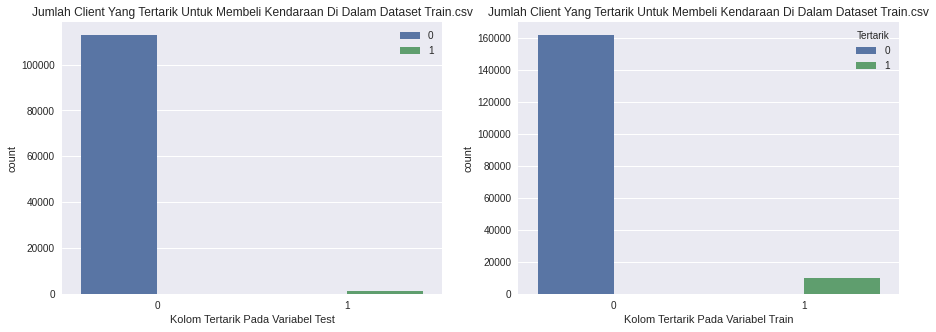

In [41]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan atau tidak
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik

## 6. Pemodelan Dengan Decision Tree Menggunakan Data Test

In [42]:
data_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,49,0,0,0,145,0
1,22,1,1,1,241,0
2,24,1,1,1,62,0
3,46,1,0,1,34,0
4,35,0,0,0,229,0


In [43]:
# Pemisahan data menjadi 2 variable

x = data_test.drop(["Tertarik"], axis=1)
y = data_test["Tertarik"]

In [44]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini kami memakai nilai test_size = 0.2 yang dimana ukuran dari variabel test mencapai 20% sehingga untuk ukuran variabel trainnya adalah 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [45]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [46]:
# Pemaggilan model decision tree terhadap variabel training

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = decisiontree.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = decisiontree.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [48]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7709 659 884 276
------------------Performa Variabel Train------------------------
33187 223 1868 2833


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7709.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 659.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 888.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 272.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 33187.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 223.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 1868.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 2833.

In [49]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree pada dataset kendaraan_train.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8368
           1       0.30      0.24      0.26      1160

    accuracy                           0.84      9528
   macro avg       0.60      0.58      0.59      9528
weighted avg       0.82      0.84      0.83      9528

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     33410
           1       0.93      0.60      0.73      4701

    accuracy                           0.95     38111
   macro avg       0.94      0.80      0.85     38111
weighted avg       0.94      0.95      0.94     38111



In [50]:
metrics.f1_score(y_test, y_pred_test)

0.26348448687350834

Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [51]:
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_train)
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_test)

Jumlah Prediksi Pada Variabel Train Adalah : [0 0 0 ... 0 0 0]
Jumlah Prediksi Pada Variabel Test Adalah : [0 0 0 ... 0 0 0]


In [52]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_test

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


In [53]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train})
output_train.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


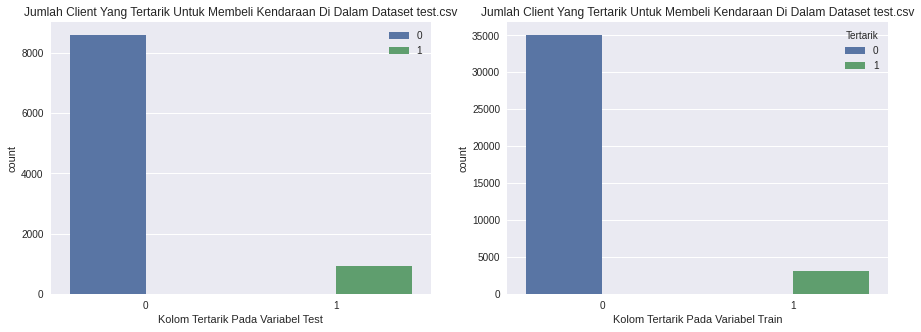

In [54]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan/tidak didalam data test.csv
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik

## 7. Simpan Prediksi Data 

In [55]:
kendaraan = data_test.append(data_train, ignore_index=True)
kendaraan.to_csv('kendaraan_Train&Test_NEW_VERSION.csv')